## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [2]:
df_train=pd.read_csv('Titanic_train.csv')
df_test=pd.read_csv('Titanic_test.csv')

## 觀察 Age

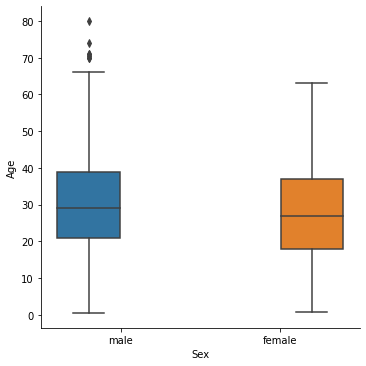

In [12]:
sns.catplot(x='Sex',y='Age',hue="Sex",
               data=df_train,kind="box")

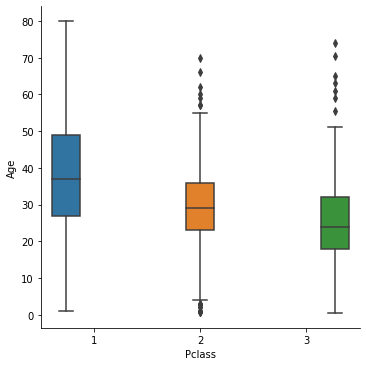

In [13]:
sns.catplot(x='Pclass',y='Age',hue="Pclass",
               data=df_train,kind="box")

In [23]:
# Step1:  離散轉連續型資料

data=df_train.copy() #複製一份資料給 data
#ValueError: could not convert string to float: 'Male', sklearn 中的 KNN 只能處理數值型態
#轉型 
#透過 preprocessing 轉換
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(df_train['Embarked'])
data.drop(['Name','Cabin','Ticket','PassengerId'],axis=1,inplace=True)
display(data)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [24]:
# Step 2 :計算資料點的倆倆距離

from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(data)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,66.077708,4.410853,47.720253,13.062925,1.988535,54.947931,24.415786,6.861488,24.326712,...,11.064224,3.559681,6.968680,3.168596,28.204887,7.750000,23.098972,17.482726,23.314427,10.111874
1,66.077708,0.000000,64.554428,18.537324,63.391247,67.230781,25.301531,61.902127,61.253755,47.701888,...,63.670834,62.917245,61.665303,65.619485,42.547882,59.379652,45.500669,51.281014,43.015240,63.878637
2,4.410853,64.554428,0.000000,46.117032,9.111291,1.937424,52.158450,27.584824,3.910651,25.306846,...,7.141488,4.870001,3.691968,1.940522,25.405511,5.454872,23.244475,16.802232,22.277918,6.247449
3,47.720253,18.537324,46.117032,0.000000,45.127625,47.819678,19.118876,46.104237,42.827607,31.246505,...,45.325707,44.590778,43.217589,47.197484,24.955974,40.939101,28.117788,31.859020,24.912045,45.537045
4,13.062925,63.391247,9.111291,45.127625,0.000000,1.154721,47.796811,35.618122,8.916655,30.560033,...,2.005936,13.269688,7.483482,10.049876,22.071602,9.460576,27.272743,16.670247,23.912392,3.176476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,7.750000,59.379652,5.454872,40.939101,9.460576,5.085221,47.331743,26.480287,3.237988,21.619718,...,7.940583,5.759061,2.692582,6.356296,20.784986,0.000000,18.867962,11.524012,17.204651,7.386643
887,23.098972,45.500669,23.244475,28.117788,27.272743,23.202090,41.291269,19.612639,20.687010,5.568214,...,26.279187,19.839329,21.546461,23.847484,20.778971,18.867962,0.000000,7.775603,7.348469,25.904874
888,17.482726,51.281014,16.802232,31.859020,16.670247,16.274470,30.561790,3.647406,13.253618,7.843832,...,16.833067,14.031404,14.130110,17.726816,7.026938,11.524012,7.775603,0.000000,8.134758,17.020660
889,23.314427,43.015240,22.277918,24.912045,23.912392,23.177448,35.594507,25.974134,19.234146,12.124562,...,23.379385,20.139488,19.754746,23.166841,14.204423,17.204651,7.348469,8.134758,0.000000,23.174609


In [31]:
# Step3: 透過 KNN 進行補值

# KNN
# 設定 k 值
value_neighbors=1
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data))
df_filled.rename(columns={0:'Survived',1:'Pclass',2:'Sex',3:'Age',4:'SibSp',5:'Parch',6:'Fare',7:'Embarked'},inplace=True)
df_filled.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0
